# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import random
random.seed(0) 

wei = [random.randint(1,50) for _ in range(140)]
val = [random.randint(1,50) for _ in range(140)]
max_weight_pct = 0.6
fitness = mlrose_hiive.Knapsack(wei, val, max_weight_pct,max_item_count=10,multiply_by_max_item_count=True)

In [4]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def knapsack_max(state):
    
    currentfit = fitness.evaluate(state)
    evaluations.append(currentfit)
    return currentfit

In [5]:
state=np.array([1]*130+[1]*10)

In [6]:
fitness.evaluate(state)

3426

In [7]:
# Check function is working correctly
state = np.array([0]*140)

# The fitness of this state should be 22
knapsack_max(state)

0

In [8]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(knapsack_max)

In [9]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 140, fitness_fn = fitness_cust, maximize = True,max_val=10)
problem_cust.set_mimic_fast_mode(True)

## Knapsack grid search

In [10]:
OUTPUT_DIRECTORY = 'output'
SEED = 1
experiment_name = 'Knapsack'


### rhc

In [13]:
from mlrose_hiive.runners import RHCRunner

experiment_name = 'knapsack'

rhc = RHCRunner(problem=problem_cust,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=[0,100,1000],
                max_attempts=1000,
                restart_list=[0,5,15,25])

df_run_stats, df_run_curves = rhc.run()  

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[16173.0000]
	[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8// 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[knapsack], attempt:[1], iteration:[100], done:[False], time:[0.02], fitness:[19495.0000]
	[7 8 9 5 0 0 1 7 6 9 2 7 5 5 6 2 4 7 7 9 4 9 0 7 9 9 7 9 9 1 0 9 9 8 5 9 8// 9 7 7 5 1 9 3 7 8 9 4 3 3 9 5 7 6 9 3 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 9 3 0 8 7 7 5 1 8 0 8 6 4 5 6 2 5 7 8 4 4 7...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[knapsack], attempt:[711], iteration:[1000], done:[True], time:[0.66], fitness:[211

restarts:[15], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[knapsack], attempt:[711], iteration:[1000], done:[True], time:[0.30], fitness:[21115.0000]
	[7 8 9 6 9 0 1 7 6 9 6 7 5 5 6 2 8 7 7 9 4 9 0 7 9 9 7 9 9 1 9 9 9 8 5 9 8// 9 7 7 5 1 9 3 9 9 9 4 6 3 9 5 7 6 9 3 7 9 9 8 6 9 3 7 7 4 5 9 4 6 8 0 2 7// 7 9 9 4 8 8 7 7 5 1 8 0 8 6 4 5 6 2 5 7 8 4 5 7...

restarts:[15], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[0.41], fitness:[15732.0000]
	[3 3 0 0 3 7 4 9 8 3 5 3 1 8 7 0 6 0 0 7 1 8 7 5 8 3 1 7 6 7 9 0 0 7 5 5 0// 1 6 3 0 6 2 3 6 3 6 2 0 5 7 6 2 5 5 1 4 0 3 3 5 3 4 3 0 3 8 9 0 7 6 5 0 1// 4 6 7 5 5 6 5 4 4 0 8 1 3 3 0 0 0 4 6 6 3 4 9 6...

restarts:[15], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[knapsack], attempt:[4], iteration:[100], done:[False], time:[0.43], fitness:[19357.0000]
	[3 3 1 0 3 7 4 9 8 7 7 4 4 8 7 6 9 0 6 7 2 8 7 5 8 3 

restarts:[15], max_iters:[1000], current_restart:[8]
runner_name:[rhc], experiment_name:[knapsack], attempt:[2], iteration:[100], done:[False], time:[4.99], fitness:[20311.0000]
	[3 9 2 7 3 4 9 2 6 9 6 2 1 7 8 3 6 5 9 7 6 9 8 9 7 8 7 9 9 6 8 0 5 3 8 2 4// 8 2 3 6 9 7 2 1 5 4 6 8 0 8 8 7 6 8 6 7 8 6 5 2 2 5 6 7 3 4 3 1 6 5 2 5 8// 2 4 8 7 0 8 9 6 7 5 7 9 5 9 8 6 7 6 9 9 9 5 5 7...

restarts:[15], max_iters:[1000], current_restart:[8]
runner_name:[rhc], experiment_name:[knapsack], attempt:[889], iteration:[1000], done:[True], time:[5.75], fitness:[20402.0000]
	[3 9 2 7 3 4 9 2 6 9 6 2 1 7 8 3 6 5 9 7 6 9 8 9 7 8 7 9 9 6 8 0 5 3 8 2 4// 8 2 3 6 9 7 2 1 5 4 6 8 0 8 8 7 6 8 6 7 8 6 5 2 2 5 6 7 3 4 5 1 6 5 3 5 8// 2 4 8 7 0 8 9 6 7 5 7 9 5 9 8 6 7 6 9 9 9 5 5 7...

restarts:[15], max_iters:[1000], current_restart:[9]
runner_name:[rhc], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[5.90], fitness:[16064.0000]
	[0 2 9 7 9 8 0 1 8 7 7 7 5 3 7 9 8 6 5 6 0 5 3 5 5 6 

restarts:[15], max_iters:[1000], current_restart:[15]
runner_name:[rhc], experiment_name:[knapsack], attempt:[879], iteration:[1000], done:[True], time:[16.03], fitness:[20145.0000]
	[5 9 9 5 8 7 2 9 5 9 6 2 4 1 6 2 9 5 7 1 6 5 9 7 7 5 5 9 7 7 5 9 6 1 1 8 7// 3 4 9 8 0 8 0 6 8 7 8 7 9 7 9 5 7 2 4 0 9 0 4 9 8 6 5 8 4 4 3 8 6 2 9 7 8// 9 3 2 9 4 7 8 3 7 3 9 7 5 8 5 4 5 6 6 7 3 7 8 6...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[25], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[16173.0000]
	[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8// 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7...

restarts:[25], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[knapsack], attempt:[1], iteration:[100]

restarts:[25], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[6.14], fitness:[16638.0000]
	[5 6 6 4 1 7 7 4 6 1 2 6 5 5 7 9 7 4 2 9 1 4 3 5 5 9 0 8 9 2 9 7 8 2 6 9 8// 1 4 8 5 0 7 7 7 2 4 2 5 3 7 7 9 6 5 0 7 3 4 7 0 6 1 0 5 5 1 1 4 5 2 8 4 2// 9 5 7 8 3 7 3 2 2 2 8 8 5 1 4 7 1 7 5 0 6 7 3 8...

restarts:[25], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[knapsack], attempt:[2], iteration:[100], done:[False], time:[6.19], fitness:[20467.0000]
	[5 6 6 7 8 8 7 4 6 1 8 6 5 7 7 9 7 6 7 9 8 4 3 5 5 9 7 8 9 2 9 7 8 2 9 9 8// 1 4 8 6 9 7 7 7 2 4 2 5 5 7 7 9 6 5 0 7 4 4 7 0 6 1 5 5 5 1 9 8 5 2 8 4 2// 9 8 7 9 3 7 8 8 2 4 8 8 7 1 4 8 6 7 5 7 6 7 3 8...

restarts:[25], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[knapsack], attempt:[429], iteration:[1000], done:[True], time:[6.98], fitness:[20543.0000]
	[5 6 6 7 8 8 7 4 6 1 8 6 5 7 7 9 7 6 7 9 8 4 3 5 5 9 

restarts:[25], max_iters:[1000], current_restart:[14]
runner_name:[rhc], experiment_name:[knapsack], attempt:[606], iteration:[1000], done:[True], time:[16.99], fitness:[20514.0000]
	[9 5 5 2 3 9 3 9 4 0 5 7 9 9 6 8 5 6 5 8 9 8 1 2 9 8 8 9 8 3 7 6 6 8 7 3 1// 6 5 8 8 8 7 0 9 9 1 9 4 7 8 8 8 6 7 6 3 5 1 4 9 8 2 7 8 4 4 8 4 7 2 9 8 2// 8 6 3 8 9 7 8 5 9 4 4 1 9 8 7 2 4 5 1 8 8 2 9 3...

restarts:[25], max_iters:[1000], current_restart:[15]
runner_name:[rhc], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[17.41], fitness:[14751.0000]
	[3 2 8 2 8 7 2 9 5 9 6 0 4 1 6 2 5 5 7 1 3 5 2 7 4 5 1 9 7 7 5 9 6 1 1 8 3// 2 4 3 4 0 6 0 6 0 7 8 7 7 7 9 5 7 2 4 0 8 0 4 7 6 6 4 8 4 4 3 6 2 2 9 4 7// 9 3 2 9 4 7 3 3 2 0 9 4 5 5 1 4 5 2 6 2 0 7 8 6...

restarts:[25], max_iters:[1000], current_restart:[15]
runner_name:[rhc], experiment_name:[knapsack], attempt:[1], iteration:[100], done:[False], time:[17.50], fitness:[18925.0000]
	[5 9 9 5 8 7 2 9 5 9 6 0 4 1 6 2 9 5 7 1 6 5 9 

restarts:[25], max_iters:[1000], current_restart:[22]
runner_name:[rhc], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[32.23], fitness:[14709.0000]
	[7 1 6 3 7 3 3 2 7 7 0 8 3 3 6 3 5 0 2 0 4 2 1 3 4 6 3 7 6 4 1 5 5 8 4 6 1// 7 1 2 1 9 9 5 3 9 3 6 7 6 4 7 3 9 8 3 4 3 3 5 3 7 9 4 2 6 2 4 9 1 6 8 4 0// 7 3 4 1 5 8 9 6 5 1 0 8 7 2 2 9 0 3 0 0 7 5 6 2...

restarts:[25], max_iters:[1000], current_restart:[22]
runner_name:[rhc], experiment_name:[knapsack], attempt:[2], iteration:[100], done:[False], time:[32.43], fitness:[18780.0000]
	[7 1 7 3 8 9 4 5 8 7 0 8 4 3 6 5 7 8 2 0 4 2 5 3 4 6 9 7 7 6 7 5 5 8 4 6 2// 7 1 2 1 9 9 6 3 9 9 6 7 6 5 7 3 9 8 8 4 3 3 5 3 7 9 4 2 9 2 4 9 1 6 8 6 6// 7 7 4 9 5 8 9 8 5 9 0 8 7 2 2 9 0 3 1 0 7 5 6 2...

restarts:[25], max_iters:[1000], current_restart:[22]
runner_name:[rhc], experiment_name:[knapsack], attempt:[787], iteration:[1000], done:[True], time:[34.44], fitness:[20802.0000]
	[7 1 7 5 8 9 4 5 8 7 8 8 4 3 9 5 7 8 7 5 4 5 9 

In [18]:
df_run_stats.groupby(['Restarts'])['Time','Fitness'].sum()

,Time,Fitness
Restarts,,
0,0.680008,56783.0
5,13.609685,338735.0
15,284.605949,895185.0
25,1269.964983,1442991.0


In [37]:
evaluations = []
best_state, best_fitness, fitness_curve_rhc,time_curve_rhc,all_time = mlrose_hiive.random_hill_climb(problem_cust, 
                                                                            max_attempts=100, max_iters=np.inf, restarts=25,
                      curve=True, random_state = 1)

In [38]:
best_fitness

21479.0

In [13]:
best_state

array([9, 6, 5, 7, 8, 8, 4, 7, 5, 8, 8, 0, 5, 9, 1, 1, 4, 6, 7, 8, 8, 2,
       9, 6, 7, 8, 3, 7, 7, 8, 4, 6, 8, 8, 9, 1, 4, 7, 1, 7, 5, 4, 6, 7,
       6, 8, 2, 9, 7, 5, 5, 7, 5, 2, 9, 8, 7, 6, 5, 5, 1, 9, 9, 3, 6, 8,
       3, 9, 9, 5, 6, 9, 5, 4, 8, 9, 6, 9, 8, 8, 8, 8, 9, 7, 1, 2, 7, 2,
       1, 6, 6, 3, 2, 7, 5, 3, 9, 7, 7, 7, 6, 9, 9, 6, 5, 4, 2, 6, 9, 8,
       5, 8, 9, 8, 9, 8, 5, 5, 0, 7, 4, 7, 9, 8, 0, 6, 9, 8, 4, 9, 1, 8,
       5, 6, 9, 2, 9, 3, 9, 9])

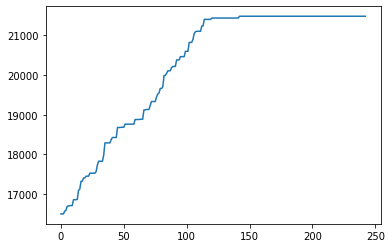

In [14]:
plt.plot(fitness_curve_rhc)

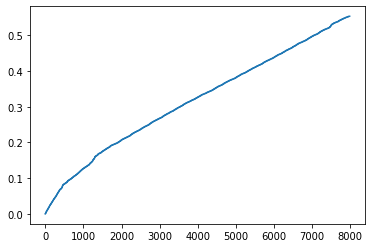

In [13]:
plt.plot(all_time)

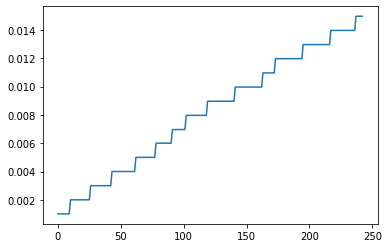

In [14]:
plt.plot(time_curve_rhc)

In [18]:
time_curve_rhc[:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00100017,
       0.00100017, 0.00100017, 0.00100017, 0.00100017, 0.00100017,
       0.00100017, 0.00100017, 0.00100017, 0.00100017, 0.00100017,
       0.00100017, 0.00100017, 0.00100017, 0.00100017, 0.00100017,
       0.00100017, 0.00100017, 0.00200009, 0.00200009, 0.00200009,
       0.00200009, 0.00200009, 0.00200009, 0.00200009, 0.00200009,
       0.00200009, 0.00200009, 0.00200009, 0.00200009, 0.00200009,
       0.00200009, 0.00300241, 0.00300241, 0.00300241, 0.00300241])

In [19]:
fitness_curve_rhc[:50]

array([16500., 16500., 16500., 16570., 16588., 16693., 16698., 16708.,
       16710., 16710., 16858., 16858., 16858., 16865., 17095., 17124.,
       17324., 17324., 17404., 17406., 17451., 17451., 17451., 17526.,
       17526., 17526., 17526., 17526., 17566., 17734., 17827., 17827.,
       17827., 17827., 17977., 18289., 18289., 18289., 18289., 18289.,
       18377., 18425., 18425., 18425., 18425., 18677., 18677., 18677.,
       18683., 18683.])

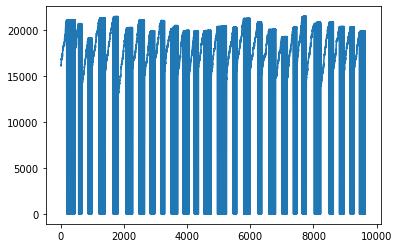

In [39]:
plt.plot(evaluations)
evaluations_rhc = evaluations.copy()
evaluations = []

### SA

In [23]:
from mlrose_hiive.runners import SARunner

sa = SARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory='output/',
              seed=1,
              iteration_list=[0,100,1000],
              max_attempts=1000,
              temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000])
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()        

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[1000]
runner_name:[sa], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[16173.0000]
	[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8// 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7...

schedule:[1], max_iters:[1000]
runner_name:[sa], experiment_name:[knapsack], attempt:[1], iteration:[100], done:[False], time:[0.02], fitness:[20518.0000]
	[7 8 9 5 0 8 1 7 6 9 6 7 5 5 6 2 8 7 7 9 4 9 0 7 9 9 7 6 9 1 9 4 9 8 3 9 8// 7 7 7 5 1 9 3 9 8 9 4 7 3 9 5 0 5 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 9 4 8 8 7 7 5 1 3 0 8 6 7 5 6 2 5 7 6 4 8 7...

schedule:[1], max_iters:[1000]
runner_name:[sa], experiment_name:[knapsack], attempt:[707], iteration:[1000], done:[True], time:[0.24], fitness:[22368.0000]
	[7 8 9 5 0 8 1 8 6 9 6 7 5 5 6 2 8 9 7 9 5 9 0 7 9 9 7 6 

schedule:[2500], max_iters:[1000]
runner_name:[sa], experiment_name:[knapsack], attempt:[340], iteration:[1000], done:[True], time:[0.20], fitness:[22496.0000]
	[7 9 5 3 5 8 6 2 9 3 8 7 2 9 6 9 8 8 4 7 9 6 9 6 5 5 1 3 5 2 8 8 6 8 7 7 4// 0 8 0 7 5 5 3 9 5 6 2 6 6 5 8 9 0 9 8 9 8 8 8 6 8 8 8 7 9 5 9 5 7 8 8 9 8// 5 6 5 8 9 7 7 5 0 8 7 8 2 9 5 8 9 2 9 4 1 0 6 4...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[5000], max_iters:[1000]
runner_name:[sa], experiment_name:[knapsack], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[16173.0000]
	[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8// 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7...

schedule:[5000], max_iters:[1000]
runner_name:[sa], experiment_name:[knapsack], attempt:[1], iteration:[100], done:[False], time:[0.01], fitness:[16762.0000]
	[7 8 2 5 0 

In [24]:
df_run_curves.head(10)

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000260,16173.0,1,1000
1,1,0.001985,16349.0,1,1000
2,2,0.002281,16349.0,1,1000
3,3,0.002479,16349.0,1,1000
4,4,0.002655,16559.0,1,1000
5,5,0.002918,16559.0,1,1000
6,6,0.003115,16559.0,1,1000
7,7,0.003296,16641.0,1,1000
8,8,0.003565,16641.0,1,1000
9,9,0.003754,16641.0,1,1000


In [33]:
schedule = 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
schedule = mlrose_hiive.ExpDecay(init_temp=50)
evaluations = []
best_state, best_fitness, fitness_curve_sa,time_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, 
                                                                                            schedule = schedule, 
                                                      max_attempts = 100, 
                                                                            max_iters = 10000, 
                                                                                    
                                                      init_state = state, random_state = 1,curve=True)


In [35]:
best_fitness

21504.0

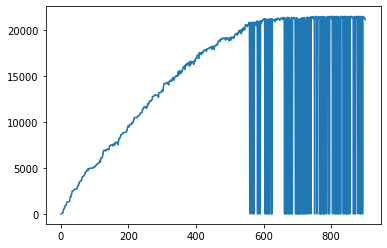

In [36]:
plt.plot(evaluations)
evaluations_sa = evaluations.copy()
evaluations = []

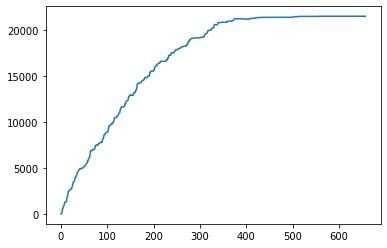

In [37]:
plt.plot(fitness_curve_sa)


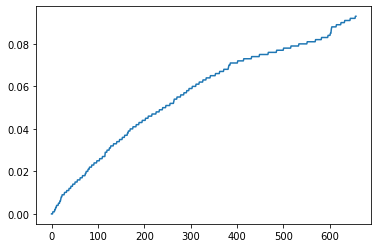

In [38]:
plt.plot(time_curve_sa)

### GA

In [19]:
from mlrose_hiive.runners import GARunner

ga = GARunner(problem=problem_cust,
              experiment_name=experiment_name,
              output_directory=OUTPUT_DIRECTORY,
              seed=SEED,
              iteration_list=[0,100,1000],
              max_attempts=1000,
              population_sizes=[150, 200, 300],
              mutation_rates=[0.4, 0.5, 0.6])

# the two data frames will contain the results
df_run_stats, df_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[1000]
runner_name:[ga], experiment_name:[Knapsack], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[16173.0000]
	[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8// 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7...

pop_size:[150], mutation_prob:[0.4], max_iters:[1000]
runner_name:[ga], experiment_name:[Knapsack], attempt:[4], iteration:[100], done:[False], time:[2.11], fitness:[27026.0000]
	[9 9 8 9 6 9 7 4 9 1 7 6 7 9 8 0 9 8 9 0 9 9 9 9 9 3 7 2 8 5 9 9 0 8 0 9 4// 0 9 0 0 1 9 0 9 8 9 7 9 0 9 8 8 1 9 0 8 1 9 6 7 8 9 4 9 9 4 9 0 9 9 5 9 2// 9 9 9 1 8 9 6 8 3 7 7 0 5 9 8 1 9 9 8 5 1 9 9 7...

pop_size:[150], mutation_prob:[0.4], max_iters:[1000]
runner_name:[ga], experiment_name:[Knapsack], attempt:[28], iteration:[1000], done:[True], time:[20.39], fitness:[2

pop_size:[300], mutation_prob:[0.4], max_iters:[1000]
runner_name:[ga], experiment_name:[Knapsack], attempt:[564], iteration:[1000], done:[True], time:[67.62], fitness:[28222.0000]
	[9 2 1 9 0 9 9 0 9 7 9 0 9 9 3 0 9 9 9 0 9 9 9 9 9 0 0 0 9 0 9 9 0 9 0 9 2// 0 9 0 0 1 9 0 9 9 9 9 9 0 9 9 9 0 9 0 6 0 9 2 9 9 9 6 9 9 0 9 0 9 9 9 9 9// 9 9 9 0 9 9 9 9 0 9 9 0 9 9 9 0 9 9 9 9 0 9 9 9...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[300], mutation_prob:[0.5], max_iters:[1000]
runner_name:[ga], experiment_name:[Knapsack], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[16173.0000]
	[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8// 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7// 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7...

pop_size:[300], mutation_prob:[0.5], max_iters:[1000]
runner_name:[ga], experiment_name:[Knapsack], attempt:[5], iteration:[100],

In [20]:
df_run_curves.head()

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.014128,18221.0,150,0.4,1000
1,1,0.040286,18905.0,150,0.4,1000
2,2,0.063159,19007.0,150,0.4,1000
3,3,0.087947,19007.0,150,0.4,1000
4,4,0.108243,19186.0,150,0.4,1000


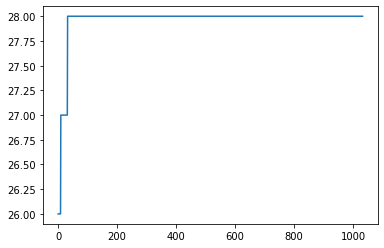

In [77]:
plt.plot(df_run_curves[(df_run_curves['Population Size']==150) & (df_run_curves['Mutation Rate']==0.4)].Fitness)

In [78]:
df_run_curves[(df_run_curves['Population Size']==150) & (df_run_curves['Mutation Rate']==0.4)].iloc[-1]

Iteration          1032.000000
Time                 17.015993
Fitness              28.000000
Population Size     150.000000
Mutation Rate         0.400000
max_iters          2048.000000
Name: 1032, dtype: float64

In [21]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].sum()

Time  Fitness
Population Size Mutation Rate                    
150             0.4            22.513175  71392.0
                0.5            21.233612  71039.0
                0.6            23.747029  71283.0
200             0.4            31.882728  71620.0
                0.5            46.375391  71421.0
                0.6            62.838602  71166.0
300             0.4            77.430308  71835.0
                0.5            68.227852  71561.0
                0.6            79.336306  71609.0

In [22]:
df_run_stats.groupby(['Population Size','Mutation Rate'])['Time','Fitness'].max()

Time  Fitness
Population Size Mutation Rate                    
150             0.4            20.390723  28193.0
                0.5            19.121855  28196.0
                0.6            21.296962  28206.0
200             0.4            29.377683  28230.0
                0.5            41.180832  28252.0
                0.6            57.880654  28226.0
300             0.4            67.618231  28222.0
                0.5            62.046824  28223.0
                0.6            73.465619  28250.0

In [94]:
df_run_curves.head()

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.016922,26.0,150,0.4,2048
1,1,0.058788,26.0,150,0.4,2048
2,2,0.117194,26.0,150,0.4,2048
3,3,0.144888,26.0,150,0.4,2048
4,4,0.196347,26.0,150,0.4,2048


In [42]:
# Solve using genetic algorithm
evaluations = []
best_state, best_fitness, fitness_curve_ga,time_curve_ga = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.5,
                                                                      pop_size= 200,
                                                                       max_attempts = 100, 
                                              random_state = 2,curve=True)


In [44]:
evaluations_ga = evaluations.copy()

In [33]:
best_fitness

28225.0

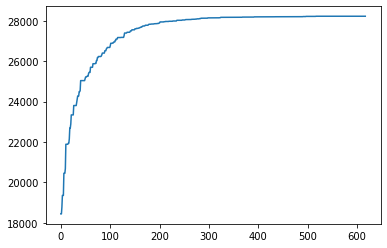

In [25]:
plt.plot(fitness_curve_ga)

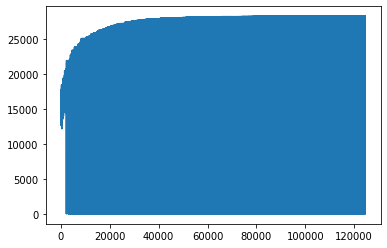

In [26]:
plt.plot(evaluations)
evaluations=[]

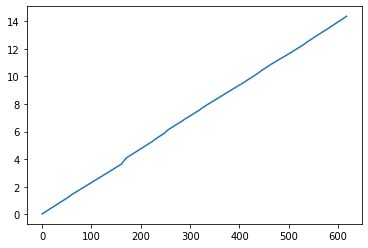

In [27]:
plt.plot(time_curve_ga)

In [17]:
from mlrose_hiive.runners import MIMICRunner

#experiment_name = 'example_experiment'
#problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)

mmc = MIMICRunner(problem=problem_cust,
                  experiment_name=experiment_name,
                  output_directory=OUTPUT_DIRECTORY,
                  seed=2,
                  iteration_list=[1000],
                  max_attempts=20,
                  population_sizes=[150, 300],
                  keep_percent_list=[0.25, 0.75])


In [18]:
df_run_stats, df_run_curves = mmc.run()   

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[150], keep_pct:[0.25], max_iters:[1000]
runner_name:[mimic], experiment_name:[Knapsack], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[14962.0000]
	[8 8 6 2 8 7 2 1 5 4 4 5 7 3 6 4 3 7 6 1 3 5 8 4 6 3 9 2 0 4 2 4 1 7 8 2 9// 8 7 1 6 8 5 9 9 9 3 0 0 2 8 8 2 9 6 5 6 6 6 3 8 2 1 4 8 1 6 9 5 1 2 4 7 6// 4 5 8 3 0 0 5 7 5 0 8 6 5 1 7 4 3 6 1 4 0 8 5 4...

use_fast_mimic:[False], pop_size:[150], keep_pct:[0.25], max_iters:[1000]
runner_name:[mimic], experiment_name:[Knapsack], attempt:[21], iteration:[38], done:[True], time:[400.09], fitness:[24139.0000]
	[8. 3. 9. 7. 0. 9. 5. 0. 9. 5. 7. 8. 8. 7. 8. 2. 2. 4. 8. 2. 8. 9. 3. 7.// 9. 2. 2. 4. 9. 2. 9. 8. 1. 5. 8. 8. 8. 1. 9. 7. 0. 6. 6. 5. 9. 4. 9. 9.// 6. 9. 6. 5. 3. 2. 9. 5. 9. 0. 7. 3. 4. 8. 9. 7. 8. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[F

In [19]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,14962.0,0.011110,"[8, 8, 6, 2, 8, 7, 2, 1, 5, 4, 4, 5, 7, 3, 6, ...",False,150,0.25,1000
1,1000,24139.0,400.089127,"[8.0, 3.0, 9.0, 7.0, 0.0, 9.0, 5.0, 0.0, 9.0, ...",False,150,0.25,1000
2,0,14962.0,0.015864,"[8, 8, 6, 2, 8, 7, 2, 1, 5, 4, 4, 5, 7, 3, 6, ...",False,150,0.75,1000
3,1000,24689.0,1509.375759,"[9.0, 7.0, 4.0, 7.0, 0.0, 9.0, 5.0, 9.0, 8.0, ...",False,150,0.75,1000
4,0,14962.0,0.022477,"[8, 8, 6, 2, 8, 7, 2, 1, 5, 4, 4, 5, 7, 3, 6, ...",False,300,0.25,1000
5,1000,25623.0,552.460206,"[9.0, 0.0, 1.0, 9.0, 0.0, 9.0, 6.0, 0.0, 9.0, ...",False,300,0.25,1000
6,0,14962.0,0.031278,"[8, 8, 6, 2, 8, 7, 2, 1, 5, 4, 4, 5, 7, 3, 6, ...",False,300,0.75,1000
7,1000,25391.0,1274.374343,"[7.0, 0.0, 1.0, 5.0, 0.0, 9.0, 1.0, 0.0, 9.0, ...",False,300,0.75,1000


In [21]:
evaluations_ga = evaluations.copy()

In [22]:
evaluations = []
best_state, best_fitness, fitness_curve_bag_queen_mmc,time_curve_mmc = mlrose_hiive.mimic(problem_cust,  
                                                                max_attempts = 100, 
                                                                 max_iters=1000,
                                                      random_state = 2,curve=True
                                                    ,keep_pct=0.25,pop_size=300
                                                                                         )

In [23]:
best_state

array([9, 0, 1, 9, 0, 9, 6, 0, 9, 1, 9, 0, 5, 9, 9, 3, 7, 9, 6, 0, 8, 7,
       4, 7, 9, 2, 2, 4, 4, 4, 8, 9, 4, 8, 3, 7, 0, 1, 9, 3, 0, 0, 9, 5,
       9, 3, 8, 2, 9, 2, 8, 9, 9, 3, 7, 2, 7, 2, 7, 8, 5, 8, 4, 6, 7, 8,
       5, 9, 9, 8, 9, 9, 6, 9, 6, 9, 9, 0, 7, 7, 9, 8, 3, 9, 5, 4, 8, 9,
       8, 8, 9, 4, 6, 7, 1, 8, 8, 9, 8, 9, 9, 9, 6, 9, 7, 8, 8, 9, 6, 5,
       8, 9, 5, 4, 8, 0, 9, 0, 0, 7, 9, 9, 9, 7, 6, 9, 8, 9, 9, 9, 9, 9,
       9, 7, 9, 8, 9, 6, 0, 9])

In [24]:
best_fitness

25623.0

In [28]:
evaluations_mmc = evaluations.copy()

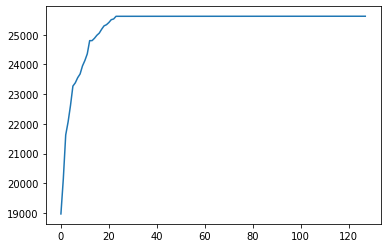

In [27]:
plt.plot(fitness_curve_bag_queen_mmc)

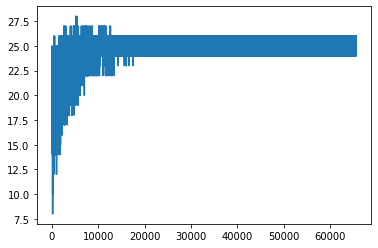

In [96]:
plt.plot(evaluations)

In [418]:
best_state

array([4, 2, 7, 5, 7, 0, 6, 3])

In [129]:
fitness_curve_sa

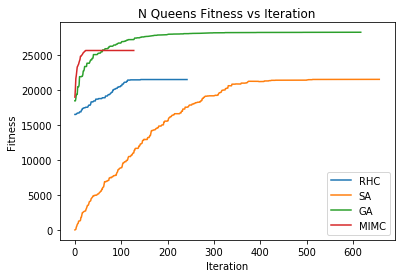

In [25]:
plt.plot(fitness_curve_rhc,label='RHC')
plt.plot(fitness_curve_sa,label='SA')
plt.plot(fitness_curve_ga,label = 'GA')
plt.plot(fitness_curve_bag_queen_mmc,label='MIMC')

plt.title('N Queens Fitness vs Iteration')
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.legend()
plt.show()

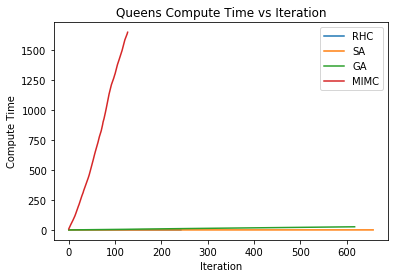

In [26]:
plt.plot(time_curve_rhc,label='RHC')
plt.plot(time_curve_sa,label='SA')
plt.plot(time_curve_ga,label = 'GA')
plt.plot(time_curve_mmc,label='MIMC')

plt.title('Queens Compute Time vs Iteration')
plt.ylabel('Compute Time')
plt.xlabel('Iteration')
plt.legend()
plt.savefig('output/queens_time_iter.png')

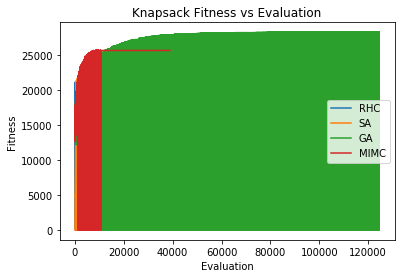

In [45]:
plt.plot(evaluations_rhc,label='RHC')
plt.plot(evaluations_sa,label='SA')
plt.plot(evaluations_ga,label = 'GA')
plt.plot(evaluations_mmc,label='MIMC')

plt.title('Knapsack Fitness vs Evaluation')
plt.ylabel('Fitness')
plt.xlabel('Evaluation')
plt.legend()
plt.savefig('output/knapsack_fit_eval.png')

In [ ]:
problem_cust = mlrose_hiive.DiscreteOpt(length = 140, fitness_fn = fitness_cust, maximize = True,max_val=10)
problem_cust.set_mimic_fast_mode(True)

## KnapSack

### SA for sacks

In [253]:
# Solve using simulated annealing - attempt 1
init_state = np.array([0]*140)
schedule = mlrose_hiive.ExpDecay()
best_state, best_fitness, fitness_curve_bag,time_curve_bag = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [254]:
best_fitness

19560.0

In [255]:
best_state

array([7, 9, 6, 0, 1, 8, 5, 9, 9, 1, 8, 6, 4, 5, 6, 1, 8, 9, 5, 7, 7, 9,
       6, 7, 3, 6, 0, 6, 9, 8, 9, 9, 9, 3, 5, 0, 6, 9, 7, 7, 9, 5, 6, 6,
       7, 8, 4, 8, 6, 4, 3, 8, 7, 6, 9, 9, 9, 9, 9, 9, 0, 9, 7, 7, 0, 2,
       4, 3, 8, 7, 0, 9, 9, 5, 8, 5, 9, 8, 8, 6, 6, 3, 7, 1, 3, 0, 0, 8,
       7, 9, 0, 0, 1, 5, 9, 7, 8, 3, 5, 0, 0, 9, 7, 3, 0, 3, 6, 5, 6, 8,
       4, 9, 8, 3, 6, 9, 7, 3, 8, 8, 0, 7, 6, 3, 4, 8, 8, 4, 9, 8, 1, 7,
       6, 2, 5, 9, 9, 9, 9, 9])

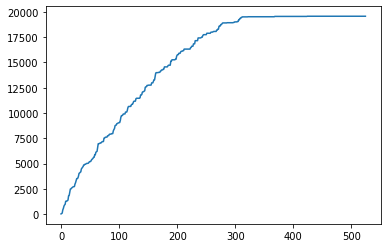

In [256]:
plt.plot(fitness_curve_bag)

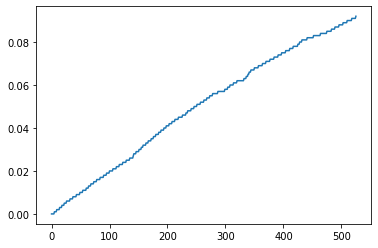

In [257]:
plt.plot(time_curve_bag)

### GA for sacks

In [258]:
# Solve using genetic algorithm
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.genetic_alg(problem_cust, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2,curve=True)

In [259]:
best_fitness

27818.0

In [245]:
np.array([1]*4+[0])

array([1, 1, 1, 1, 0])

In [246]:
state = np.array([1, 1, 1, 1, 1])

In [218]:
fitness.evaluate(state)

0

In [260]:
best_state

array([9, 2, 4, 9, 0, 9, 9, 2, 9, 3, 9, 2, 9, 9, 4, 3, 9, 9, 9, 0, 9, 9,
       9, 9, 9, 0, 3, 0, 9, 0, 9, 9, 0, 8, 3, 9, 3, 0, 9, 3, 1, 0, 9, 1,
       9, 9, 9, 9, 9, 2, 9, 9, 9, 0, 9, 0, 4, 0, 9, 5, 9, 9, 9, 0, 8, 9,
       4, 9, 0, 9, 9, 9, 8, 9, 9, 9, 9, 6, 9, 9, 9, 9, 2, 9, 7, 2, 7, 9,
       9, 0, 9, 8, 9, 6, 0, 9, 9, 9, 9, 9, 8, 9, 7, 9, 9, 9, 4, 8, 9, 0,
       9, 9, 9, 5, 9, 1, 9, 0, 2, 9, 9, 9, 8, 9, 5, 9, 9, 9, 9, 9, 1, 9,
       0, 9, 9, 9, 9, 4, 0, 9])

In [209]:
weights

[10, 5, 2, 8, 15]

In [229]:
sum(best_state)

634

In [178]:
sum(wei)

3623

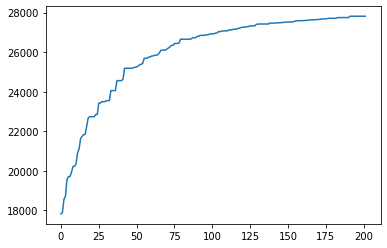

In [261]:
plt.plot(fitness_curve_bag)

## mimic for sacks

In [183]:
state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [263]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [348]:
best_state, best_fitness, fitness_curve_bag = mlrose_hiive.mimic(problem_cust,  max_attempts = 1000, 
                                                                 max_iters=10000,
                                              random_state = 2,curve=True)

In [264]:
best_fitness

24614.0

In [165]:
len(wei)

140

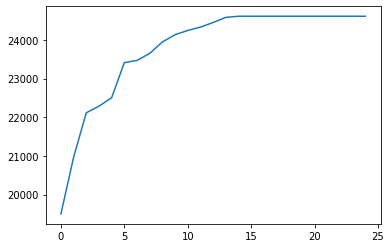

In [265]:
plt.plot(fitness_curve_bag)

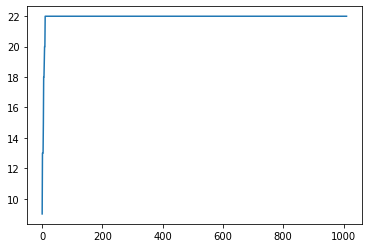

In [350]:
plt.plot(fitness_curve_bag)

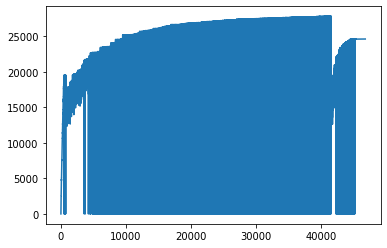

In [267]:
plt.plot(np.array(evaluations))

In [349]:
with open('mimic_sack_eval.npy', 'wb') as f:
    np.save(f, np.array(evaluations))
with open('mimic_sack_fit_curve.npy', 'wb') as f:
    np.save(f, np.array(best_state))
with open('mimic_sack_best_fitness.npy', 'wb') as f:
    np.save(f, np.array(fitness_curve_bag))

In [300]:
    
with open('output/mimic_sack_eval.npy', 'rb') as f:
    a = np.load(f)


In [299]:
import os
os.getcwd()

'C:\\Users\\xiaoyal\\github\\ml_7641\\homework2\\mlrose-master'

# four peaks


In [ ]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.15)


In [352]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.FourPeaks(t_pct=0.2)


### customized fitness function to keep track of evaluations

In [354]:
# Define alternative N-Queens fitness function for maximization problem
evaluations = []
def fourpeak_max(state):
    
    # Initialize counter
    currentfit = fitness.evaluate(state)
    evaluations.append(currentfit)
    return currentfit

In [355]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(fourpeak_max)

In [356]:
# Check function is working correctly
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
# The fitness of this state should be 22
fitness_cust.evaluate(state)

4

In [357]:
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 60, fitness_fn = fitness_cust, maximize = True, max_val = 2)

In [326]:
random.randint(0,1)

1

In [330]:
init_state[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0]

### SA for 4 peak

In [353]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [362]:
# Solve using simulated annealing - attempt 1
random.seed(0)
init_state = [random.randint(0,1) for _ in range(60)]

best_state, best_fitness, fit_curve,fit_time = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 1000, max_iters = 10000, 
                                                      init_state = init_state, random_state = 1,curve= True)

In [363]:
best_fitness

60.0

In [360]:
best_state

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

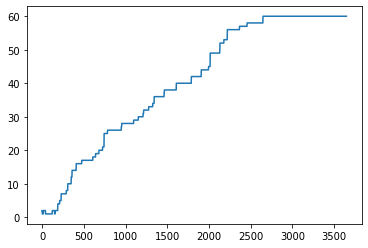

In [364]:
plt.plot(fit_curve)

## mimic for 4 peaks

In [365]:
from mlrose_hiive import mimic

In [368]:
best_state, best_fitness, fitness_curve_mimic = mlrose_hiive.mimic(problem_cust,  max_attempts = 10, 
                                                                 max_iters=100,
                                              random_state = 2,curve=True)

In [369]:
best_fitness

22.0

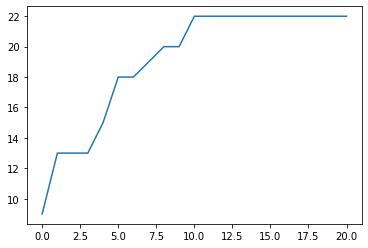

In [371]:
plt.plot(fitness_curve_mimic)

### GA for 4 peaks

In [379]:
best_state, best_fitness, fit_curve = mlrose_hiive.genetic_alg(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True)

In [380]:
best_fitness

107.0

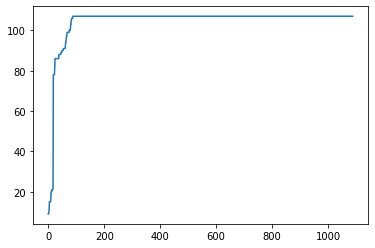

In [381]:
plt.plot(fit_curve)

### rhc for 4 peaks

In [384]:
best_state, best_fitness, fit_curve = mlrose_hiive.random_hill_climb(problem_cust, max_attempts=1000,max_iters=10000, 
                                                               random_state = 2,curve= True,restarts = 5)

In [386]:
best_fitness

60.0

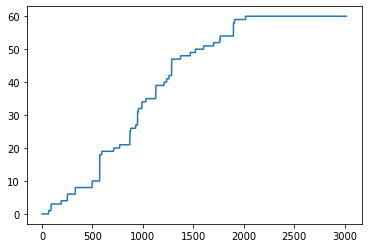

In [385]:
plt.plot(fit_curve)

In [427]:
random.seed(0) 

wei = [random.randint(1,50) for _ in range(140)]

In [428]:
wei[:10]

[25, 49, 27, 3, 17, 33, 32, 26, 20, 31]